In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn.metrics as mean_squared_error
import yfinance as yf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [2]:
stock_symbol = 'ADANIENT.NS'
data = yf.download(stock_symbol, start='2023-05-10', end='2024-05-10')
print(data.head())

[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open      Volume
Ticker      ADANIENT.NS  ADANIENT.NS  ADANIENT.NS  ADANIENT.NS ADANIENT.NS
Date                                                                      
2023-05-10  1889.497314  1912.215420  1881.308737  1896.337687     1970906
2023-05-11  1981.867432  2010.926607  1907.322071  1922.301040     8835941
2023-05-12  1961.945435  2007.181973  1943.820978  2006.183375     3816201
2023-05-15  1913.363770  1961.945465  1877.364262  1957.152268     4836782
2023-05-16  1886.501465  1932.287159  1878.362867  1924.298375     3058799


In [3]:
print(data.columns)

MultiIndex([( 'Close', 'ADANIENT.NS'),
            (  'High', 'ADANIENT.NS'),
            (   'Low', 'ADANIENT.NS'),
            (  'Open', 'ADANIENT.NS'),
            ('Volume', 'ADANIENT.NS')],
           names=['Price', 'Ticker'])


In [4]:
print(data.isnull().sum())
data = data.dropna()
data['Close'] = data[('Close', 'ADANIENT.NS')].interpolate()
print(data.isnull().sum())

Price   Ticker     
Close   ADANIENT.NS    0
High    ADANIENT.NS    0
Low     ADANIENT.NS    0
Open    ADANIENT.NS    0
Volume  ADANIENT.NS    0
dtype: int64
Price   Ticker     
Close   ADANIENT.NS    0
High    ADANIENT.NS    0
Low     ADANIENT.NS    0
Open    ADANIENT.NS    0
Volume  ADANIENT.NS    0
dtype: int64


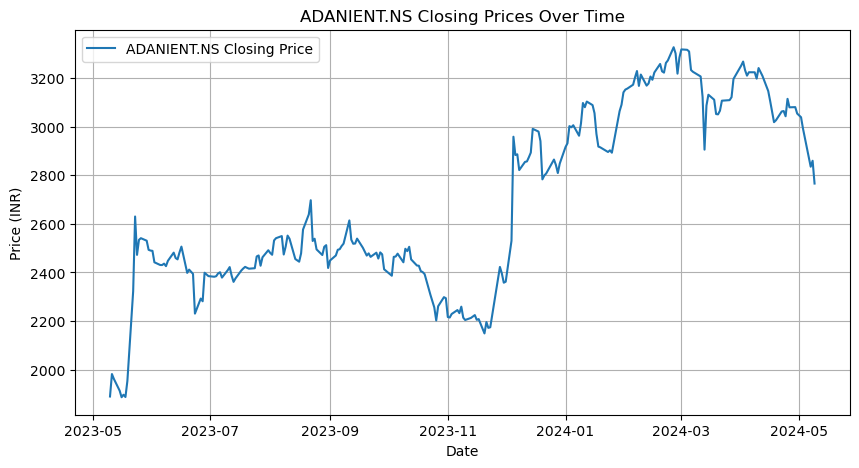

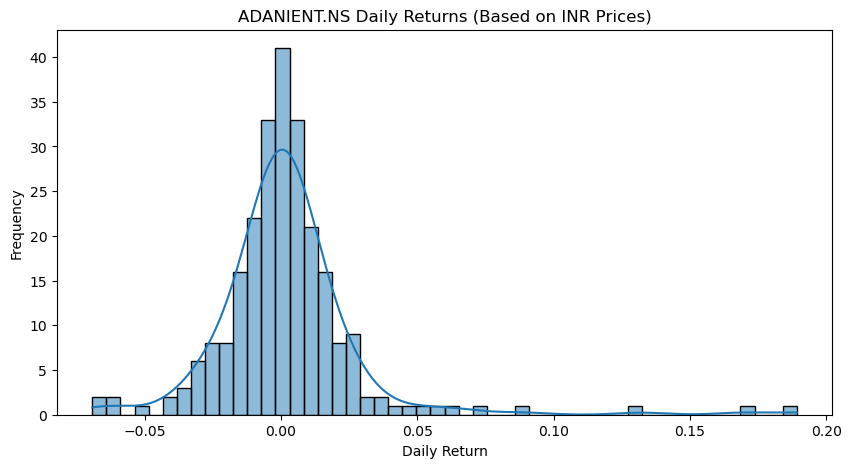

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(data['Close'], label=f'{stock_symbol} Closing Price')
plt.title(f'{stock_symbol} Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid()
plt.show()

data['Daily Return'] = data['Close'].pct_change()

plt.figure(figsize=(10, 5))
sns.histplot(data['Daily Return'].dropna(), bins=50, kde=True)
plt.title(f'{stock_symbol} Daily Returns (Based on INR Prices)')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

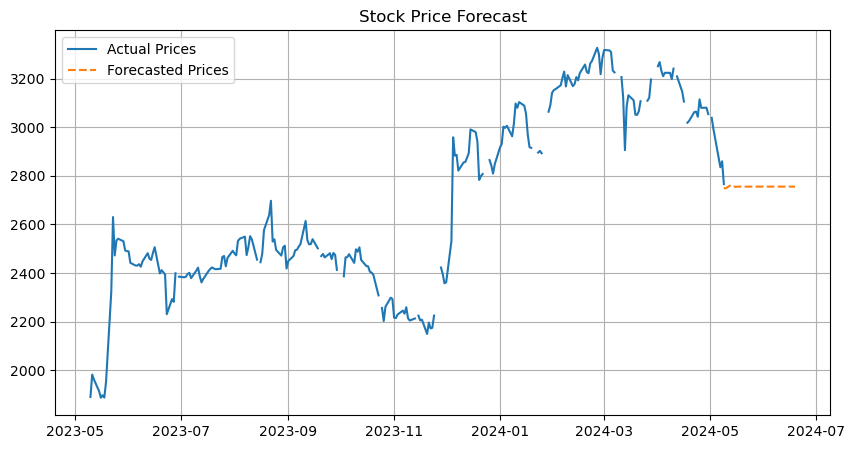

In [6]:
data.index = pd.to_datetime(data.index)
data = data.asfreq('B')  

model = ARIMA(data['Close'], order=(5, 1, 0))
model_fit = model.fit()

forecast = model_fit.forecast(steps=30)

plt.figure(figsize=(10, 5))
plt.plot(data['Close'], label='Actual Prices')
plt.plot(pd.date_range(data.index[-1], periods=30, freq='B'), forecast, label='Forecasted Prices', linestyle='--')
plt.title('Stock Price Forecast')
plt.legend()
plt.grid()
plt.show()

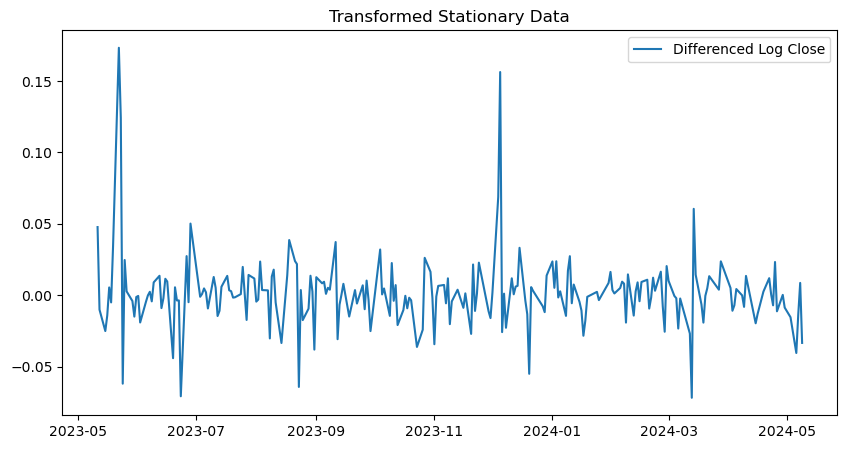

In [7]:
data['Log Close'] = np.log(data['Close', 'ADANIENT.NS'])
data['Diff Log Close'] = data['Log Close'].diff()

plt.figure(figsize=(10, 5))
plt.plot(data['Diff Log Close'].dropna(), label='Differenced Log Close')
plt.title('Transformed Stationary Data')
plt.legend()
plt.show()

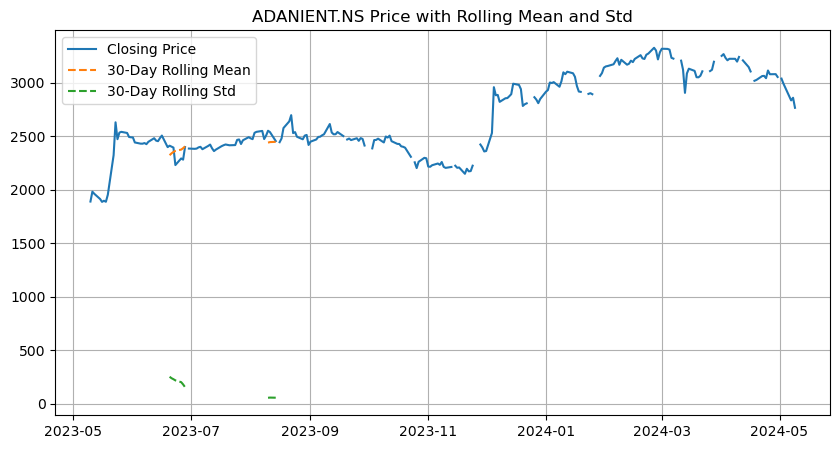

In [8]:
data['Rolling Mean'] = data['Close'].rolling(window=30).mean()
data['Rolling Std'] = data['Close'].rolling(window=30).std()
plt.figure(figsize=(10, 5))
plt.plot(data['Close'], label='Closing Price')
plt.plot(data['Rolling Mean'], label='30-Day Rolling Mean', linestyle='--')
plt.plot(data['Rolling Std'], label='30-Day Rolling Std', linestyle='--')
plt.title(f'{stock_symbol} Price with Rolling Mean and Std')
plt.legend()
plt.grid(True)
plt.show()

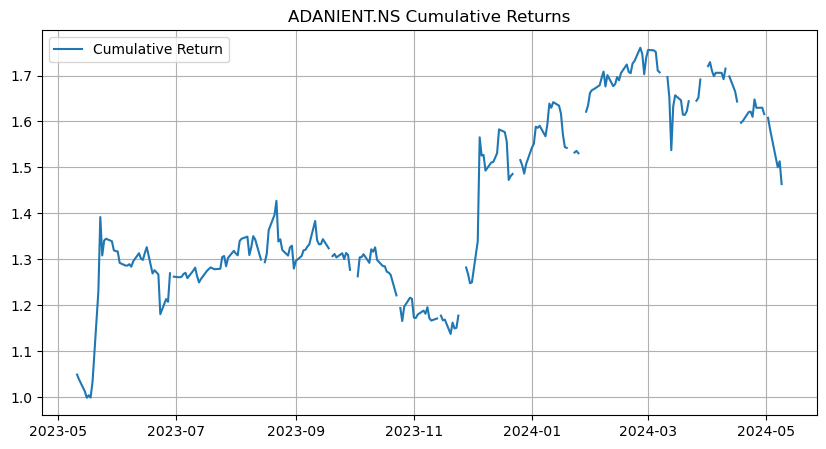

In [9]:
data['Cumulative Return'] = (1 + data['Daily Return']).cumprod()
plt.figure(figsize=(10, 5))
plt.plot(data['Cumulative Return'], label='Cumulative Return')
plt.title(f'{stock_symbol} Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

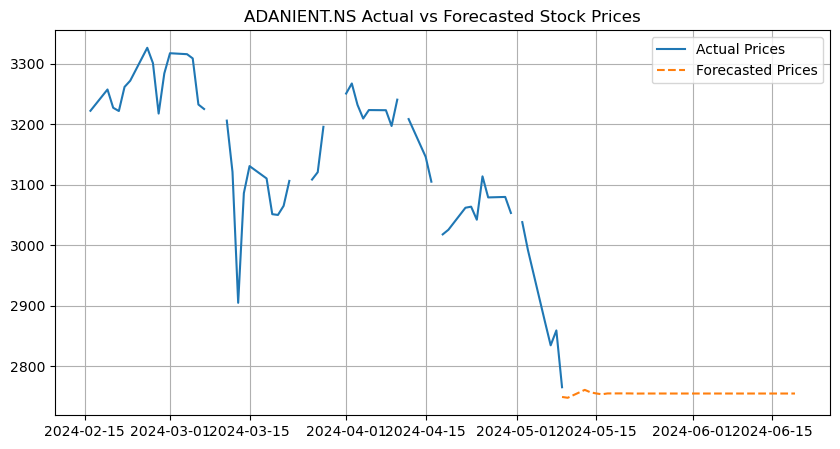

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(data['Close'][-60:], label='Actual Prices')
plt.plot(pd.date_range(data.index[-1], periods=30, freq='B'), forecast, label='Forecasted Prices', linestyle='--')
plt.title(f'{stock_symbol} Actual vs Forecasted Stock Prices')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
forecast_df = pd.DataFrame({'Date': pd.date_range(start=data.index[-1], periods=30, freq='B'), 
                            'Forecasted Price': forecast})
forecast_df.to_csv('stock_price_forecast.csv', index=False)
print("Forecast saved to stock_price_forecast.csv")

Forecast saved to stock_price_forecast.csv


## Conclusion

### In this project, we analyzed Adani Enterprises (ADANIENT.NS) stock prices from May 2023 to May 2024. We visualized trends, calculated daily and cumulative returns, and forecasted future prices using the ARIMA model. The analysis showed:
### 1) Trends: The stock prices had noticeable fluctuations over time.
### 2) Returns: Daily returns highlighted the stock's volatility, while cumulative returns showed overall growth.
### 3) Forecast: A 30-day price forecast provided insights into potential future trends.
### This project helped us understand stock analysis basics, including data visualization, trend analysis, and time series forecasting. A great start to building financial analytics skills!